In [2]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART
import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

#part a
from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

In [3]:
#part b
import matplotlib.pyplot as plt

#derivative of sigmoid function
def gradient(x):
    return sigmoid(x) * (1 - sigmoid(x))

#get loss
def getLoss(y, yPred):
    return np.mean(0.5 * (y- yPred) ** 2)

#part c
class NN:
    def __init__(self):
        #initialize parameters and biases
        self.w1 = np.random.uniform(-1, 1, size = (2, 3)) 
        self.b1 = np.array([1, 1, 1], dtype = float)
        self.w2 = np.random.uniform(-1, 1, size = (3, 1)) 
        self.b2 = np.array([1], dtype = float)

    def forward(self, x):
        #calculate sum of weight1 and x with bias1
        self.h0 = np.dot(x, self.w1) + self.b1
        #apply sigmoid to h0
        self.a1 = sigmoid(self.h0)
        #calculate sum of a1, weight2, and x with bias2
        self.h1 = np.dot(self.a1, self.w2) + self.b2
        #apply sigmoid to h1
        self.a2 = sigmoid(self.h1)
        return self.a2

    def backward(self, x, y, yPred, learning_rate):
        #reshape x to fit
        x = np.array(x)
        #calculate loss
        loss = yPred - y
        #get loss gradient for second layer activation
        dh2 = loss * gradient(self.h1)
        #get loss gradient for second layer weight
        dw2 = np.dot(self.a1.T, dh2)
        #get loss gradient for second layer bias
        db2 = np.sum(dh2)
        #get loss gradient for first layer activation
        da1 = np.dot(dh2, self.w2.T)
        # get loss gradient for first layer total weight
        dh1 = da1 * gradient(self.h0)
        #get loss gradient for first layer weights
        dw1 = np.dot(x.T, dh1)
        #get loss gradient for first layer bias
        db1 = np.sum(dh1)
        #update weights and biases
        self.w1 -= learning_rate * dw1
        self.b1 -= learning_rate * db1
        self.w2 -= learning_rate * dw2
        self.b2 -= learning_rate * db2

    #part d
    def train(self, x_train, y_train, x_valid, y_valid, epochs, learning_rate):
        trainCosts = []
        validCosts = []

        #part e
        for epoch in range(epochs):
            #get y predictions from x training dataset
            yPred = self.forward(x_train)
            #get loss value of y predictions
            loss = getLoss(y_train, yPred)
            trainCosts.append(loss)

            #update neural network with training datasets and predictions
            self.backward(x_train, y_train, yPred, learning_rate)
            #get true y values from x valid dataset
            yTrue = self.forward(x_valid)
             #get loss value of y true values
            trueLoss = getLoss(y_valid, yTrue)
            validCosts.append(trueLoss)
            
            print(f"Epoch: {epoch + 1}, Train Loss: {loss}, Valid Loss: {trueLoss}")
        plt.plot(range(len(trainCosts)), trainCosts, label = "Training Loss")
        plt.plot(range(len(validCosts)), validCosts, label = "Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Training and Validation Loss")
        plt.legend()
        plt.show()
        # return trainCosts, validCosts

In [37]:
def findRate(x_train, y_train, x_valid, y_valid, epochs):
    #create an array of learning rates from .0001 to .009
    learningRates = np.logspace(-4, np.log10(0.009), num = 150)
    
    learningRateDict = {}

    for learningRate in learningRates:
        #reset model for each learning rate
        model = NN()
        trainCosts = []
        validCosts = []

        #part e
        for _ in range(epochs):
            #get y predictions from x training dataset
            yPred = model.forward(x_train)
            #get loss value of y predictions
            loss = getLoss(y_train, yPred)
            trainCosts.append(loss)
            
            #update neural network with training datasets and predictions
            model.backward(x_train, y_train, yPred, learningRate)
            #get y true from x valid dataset
            yTrue = model.forward(x_valid)
            #get loss value of y true
            trueLoss = getLoss(y_valid, yTrue)
            validCosts.append(trueLoss)
        print(f"Learning Rate {learningRate}, Train Loss: {loss}, Valid Loss: {trueLoss}")
        #assign the learning rate with the lowest validLoss value during the epoch run
        learningRateDict[learningRate] = validCosts[-1]

    
    #sort through the keys to get the lowest learningRate in the dictionary based on lowest validLoss
    rate = min(learningRateDict, key = learningRateDict.get)
    
    return rate

Epoch: 1, Train Loss: 0.06953219360786274, Valid Loss: 0.04539241339699749
Epoch: 2, Train Loss: 0.06263932429247145, Valid Loss: 0.04014928232347724
Epoch: 3, Train Loss: 0.056104385564565096, Valid Loss: 0.035583308719526946
Epoch: 4, Train Loss: 0.05020821663825504, Valid Loss: 0.03185163221428338
Epoch: 5, Train Loss: 0.04515672164790046, Valid Loss: 0.028998016662703668
Epoch: 6, Train Loss: 0.041041620160090005, Valid Loss: 0.026959905725787017
Epoch: 7, Train Loss: 0.03783909084409055, Valid Loss: 0.02560481075153437
Epoch: 8, Train Loss: 0.03544125883110751, Valid Loss: 0.024774468467614417
Epoch: 9, Train Loss: 0.033699975101497595, Valid Loss: 0.0243188430811189
Epoch: 10, Train Loss: 0.032463677063711234, Valid Loss: 0.024113927925355345
Epoch: 11, Train Loss: 0.03159921644972028, Valid Loss: 0.024066304826173713
Epoch: 12, Train Loss: 0.03100008212378787, Valid Loss: 0.02411020507414441
Epoch: 13, Train Loss: 0.030586122076091866, Valid Loss: 0.02420175234339171
Epoch: 14, 

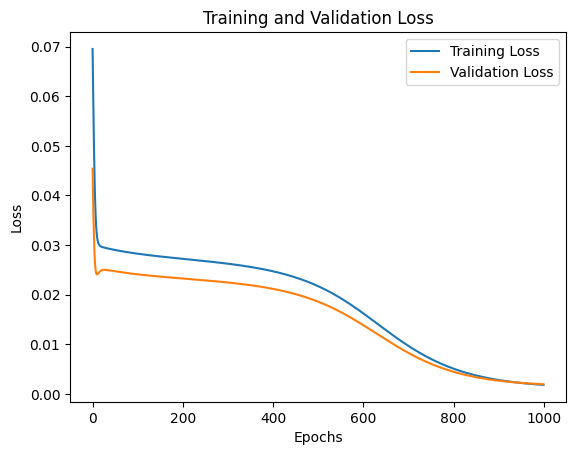

In [10]:
model = NN()
#reshape y_train and y_valid to avoid shape mismatch
y_train = np.reshape(y_train, (-1, 1))
y_valid = np.reshape(y_valid, (-1, 1))
model.train(x_train, y_train, x_valid, y_valid, 1000, 0.006)

In [38]:
rate = findRate(x_train, y_train, x_valid, y_valid, 300)
print(rate)

Learning Rate 0.0001, Train Loss: 0.08142600731493486, Valid Loss: 0.06174919439863787
Learning Rate 0.0001030660712362243, Train Loss: 0.047797956689563714, Valid Loss: 0.034800042530439994
Learning Rate 0.00010622615040070461, Train Loss: 0.0337098020644152, Valid Loss: 0.024564271990645897
Learning Rate 0.00010948311984348897, Train Loss: 0.11060310425642049, Valid Loss: 0.08811764576502412
Learning Rate 0.00011283995028953128, Train Loss: 0.0275492381525136, Valid Loss: 0.021108028235640813
Learning Rate 0.0001162997035483284, Train Loss: 0.04778376113222588, Valid Loss: 0.03391970864718364
Learning Rate 0.00011986553530663781, Train Loss: 0.08912771431766559, Valid Loss: 0.06823356040047614
Learning Rate 0.0001235406980068209, Train Loss: 0.031262484977666684, Valid Loss: 0.022681969584264845
Learning Rate 0.00012732854381343876, Train Loss: 0.035714396412557026, Valid Loss: 0.02554574518578327
Learning Rate 0.00013123252767080587, Train Loss: 0.03096462680015613, Valid Loss: 0.02

Epoch: 1, Train Loss: 0.12855401451932277, Valid Loss: 0.0979138438806015
Epoch: 2, Train Loss: 0.12360650855276918, Valid Loss: 0.09213141591348079
Epoch: 3, Train Loss: 0.11715639695817533, Valid Loss: 0.08460432011175534
Epoch: 4, Train Loss: 0.10868152355434557, Valid Loss: 0.07490190125972485
Epoch: 5, Train Loss: 0.09761320793297605, Valid Loss: 0.06289273418059382
Epoch: 6, Train Loss: 0.08364560028852441, Valid Loss: 0.04939847383592564
Epoch: 7, Train Loss: 0.06746807948036547, Valid Loss: 0.036788773284069425
Epoch: 8, Train Loss: 0.051562909442478155, Valid Loss: 0.027975284396673534
Epoch: 9, Train Loss: 0.03936786647001763, Valid Loss: 0.023763405156977835
Epoch: 10, Train Loss: 0.03234855451464563, Valid Loss: 0.022531764914174014
Epoch: 11, Train Loss: 0.029158468975801547, Valid Loss: 0.022498166164313837
Epoch: 12, Train Loss: 0.027887095104036103, Valid Loss: 0.022760527801118684
Epoch: 13, Train Loss: 0.02739818072422015, Valid Loss: 0.023014441538856473
Epoch: 14, T

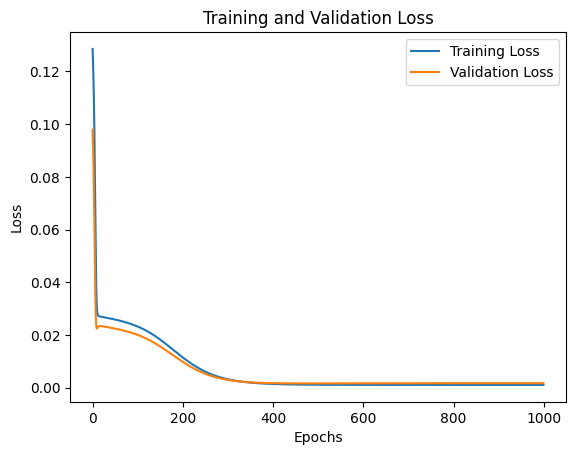

In [33]:
new = NN()
new.train(x_train, y_train, x_valid, y_valid, 1000, rate)

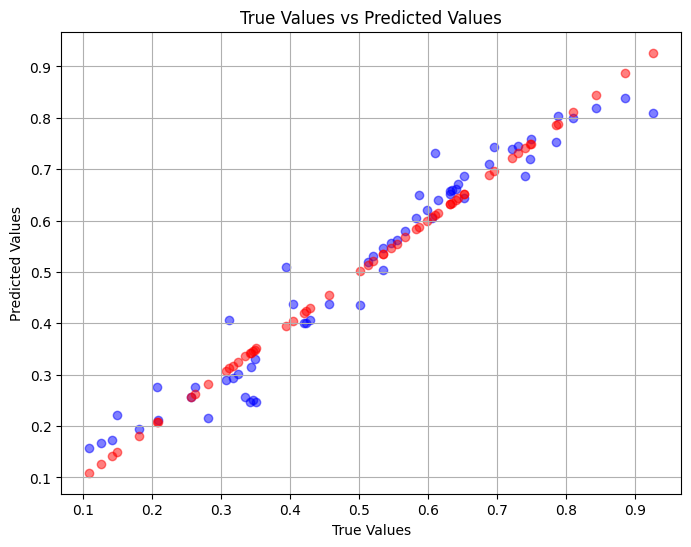

In [20]:
yPred = new.forward(x_test)

#plot scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, yPred, color = "blue", alpha=0.5)
plt.scatter(y_test, y_test, color = "red", alpha=0.5)
plt.title("True Values vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()
